# EDA Google Play Data
**Authors**: Huub, Roman

**TODO**:
- Huub: Do univariate analysis per variable
- Roman: Peer Review and do additions
- Both: Add *very* basic multivariate analysis and write down *very* good ideas

**Order of assignment**:
1. Basic Data Understanding
2. Know the theoretical lenses and pick 2
3. Do additional analysis tailored to picked lenses
4. Think of research questions

**Remarks for the rest of group**
- Don't try to to rerun, some things take a couple of minutes. Just try to make cheese out of it.


### Import Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import re
from langdetect import detect
import os

ModuleNotFoundError: No module named 'langdetect'

#### Load all data, not recommended

In [ ]:
sets = ['google_data_first.csv', 'google_data_last.csv', 'app_sdk.csv']
data_sets = []
for dataset in sets:
  path = os.path.join('data', dataset)
  df = pd.read_csv(path, encoding='ISO-8859-1')
  data_sets.append(df)
google_first, google_last, app_sdk = data_sets

for i in range(len(data_sets)):
  data_sets[i].drop(['Unnamed: 0'], axis=1, inplace=True)

#### Load Sampled data, 0.15 random sample of original

In [ ]:
sets = ['google_data_first_sample.csv', 'google_data_last_sample.csv', 'app_sdk_sample.csv']
data_sets = []
for dataset in sets:
  path = os.path.join('Data', dataset)
  df = pd.read_csv(path)
  data_sets.append(df)
google_first, google_last, app_sdk = data_sets

## Univariate Analysis

In [ ]:
google_first.head()

,Unnamed: 0,my_app_id,date_published,privacy_policy,rating_app,nb_rating,num_downloads,content_rating_app,developer,categ_app,...,nb_screenshots,description,whats_new,email_to,developer_info,similar_apps_top15,visit_website,more_from_developer,family_library,permissions
0,588854,com.vsc.IPmotionLite,"October 23, 2014",NaN,3.7,45,"10,000+",PEGI 3 Learn More,VIDEO+SURVEILLANCE+SYSTEM+COMP,Tools,...,9.0,This app allows users connect to IP-Camera liv...,NaN,surveillance171@gmail.com,Visit website video.surveillance171@gmail.com,"com.mcu.reolink, com.tvt.superliveplus, com.mi...",http://www.videosurveillancecompany.com/,"com.vsc.ipmotion, com.vsc.torch_camera, com.vs...",False,"read the contents of your USB storage, modif..."
1,99057,com.altimimi.karar.darmy,"April 6, 2018",NaN,4.8,519,"50,000+",PEGI 3 Learn More,Karar+altimimi,Lifestyle,...,8.0,.. : 1- 2- 3- 4- 5- 6- 7- 8 - 9- .. Applicatio...,NaN,altimimi@gmail.com,karar.altimimi@gmail.com,"com.uuteam.agnoorzein, com.sumarya, com.gov.iq...",NaN,"com.altimimi.karar.HussainFaisal, com.altimimi...",False,"view network connections, full network access"
2,547008,com.techtweets.allah,"April 1, 2017",NaN,4.5,15,"1,000+",PEGI 3 Learn More,Tech-tweets,Lifestyle,...,3.0,"99 name of Allah, Bangla meaning, there virtue...",NaN,ayeshabegum200@gmail.com,Visit website ayeshabegum200@gmail.com,"bd.jetbrain.nazim.al_quran, com.kutblog.arabic...",http://techtweets.com.bd/,"com.techtweets.mswordshortcut, com.techtweets....",False,"view network connections, full network acces..."
3,386847,com.mecom.ed.nl,"April 23, 2018",http://www.persgroep.nl/privacy,3.5,461,"50,000+",PEGI 3 Learn More,De+Persgroep+Publishing,News & Magazines,...,6.0,Download nu de gratis nieuws app van ED. Zo be...,NaN,appfeedback@ed.nl,Visit website appfeedback@ed.nl Privacy ...,"nl.sanomamedia.android.nu, be.persgroep.androi...",http://www.ed.nl,"be.persgroep.android.news.mobilevk, be.persgro...",False,"approximate location (network-based), read t..."
4,135670,com.apusapps.theme.i_gorgeous_flower_0a62e69d7e,"August 17, 2018",http://static.themes.apusapps.com/theme/privac...,4.4,"1,072","100,000+",PEGI 3 Learn More,CoolAppPub,Personalization,...,3.0,"Flower| theme, free, beautiful, stylish Androi...",NaN,useforapp2016@gmail.com,Visit website useforapp2016@gmail.com Pr...,com.apusapps.theme.i_white_dragon_cool_f0551d0...,http://www.apusapps.com,com.apusapps.theme.i_evil_bloody_dinosaur_them...,False,"read the contents of your USB storage, modif..."


In [ ]:
# print variable names and dtypes of google_first
for var in google_first.columns:
    print(f"{var.ljust(30)} {str(google_first[var].dtype).rjust(10)}")


Unnamed: 0                          int64
my_app_id                          object
date_published                     object
privacy_policy                     object
rating_app                        float64
nb_rating                          object
num_downloads                      object
content_rating_app                 object
developer                          object
categ_app                          object
in_app                               bool
has_ads                              bool
price_gplay                       float64
operating_system                   object
software_version                   object
interactive_element                object
in_app_product                     object
developer_name                     object
nb_screenshots                      int32
description                        object
whats_new                         float64
email_to                           object
developer_info                     object
similar_apps_top15                

### Date Published

<Axes: xlabel='date_published', ylabel='Density'>

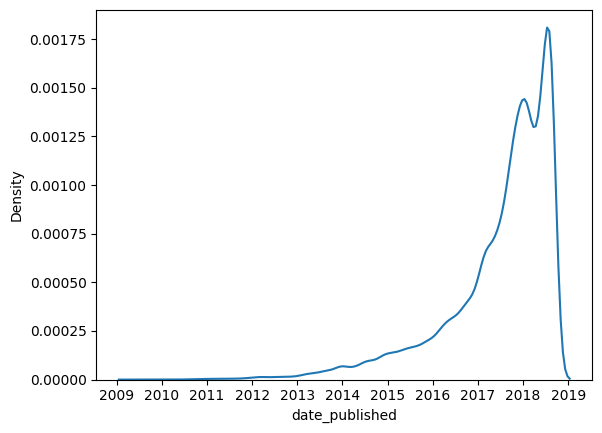

In [ ]:
# Change the data format of data_published to datetime
google_first['date_published'] = pd.to_datetime(google_first['date_published'])

# frequency plot of date published

# sns.histplot(x='date_published', data=google_first)
sns.kdeplot(x='date_published', data=google_first)

### Privacy Policy
Increasing trend over the apps that provide privacy policy.

In [ ]:
google_first['privacy_policy'].isna().value_counts() / sum(google_first['privacy_policy'].isna().value_counts())

False    0.60604
True     0.39396
Name: privacy_policy, dtype: float64

In [ ]:
google_last['privacy_policy'].isna().value_counts() / sum(google_last['privacy_policy'].isna().value_counts())

False    0.750893
True     0.249107
Name: privacy_policy, dtype: float64

### rating_app

<Axes: xlabel='rating_app', ylabel='Count'>

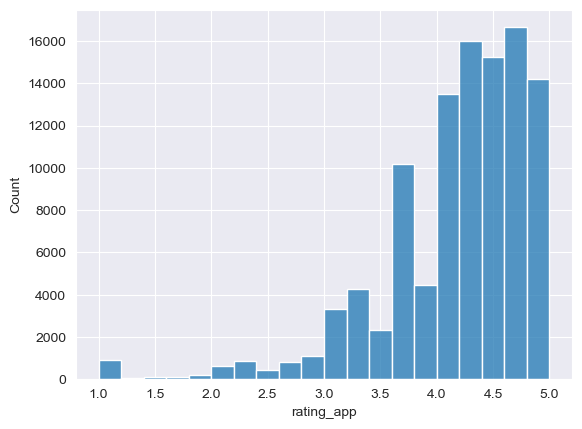

In [ ]:
# sns.kdeplot(x='rating_app', data=google_first)
sns.histplot(x='rating_app', data=google_first, bins=20)

### nb_rating
plot on log scale, seems that about 80 percent of the apps has less than 1000 ratings

few apps with exeptionally high ratings

further investigation: ratings per category

In [ ]:
# cast nb_rating to int, commas are deleted, there are no 0 values so we assume that NAN means 0 rating
google_first['nb_rating'] = google_first['nb_rating'].str.replace(',', '')
# 0 are replaced with 0.1 to be able to represent as log scale
google_first['nb_rating'].fillna(0.1, inplace=True)
google_first['nb_rating'] = google_first['nb_rating'].astype(float)

<Axes: xlabel='nb_rating', ylabel='Count'>

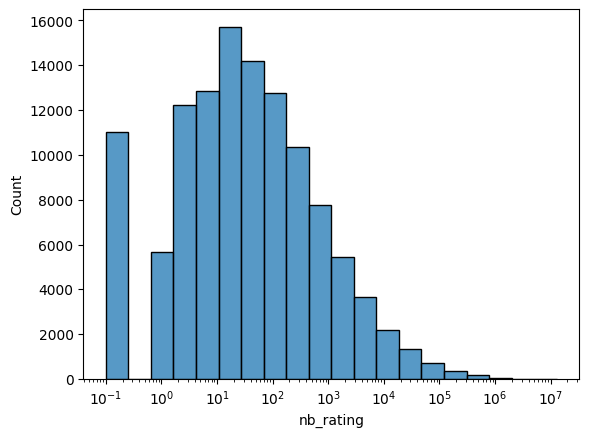

In [ ]:
sns.histplot(x='nb_rating', data=google_first, log_scale=True, bins=20)

In [ ]:
# show top 5 apps with most ratings
google_first.sort_values(by='nb_rating', ascending=False).head(5)

,Unnamed: 0,my_app_id,date_published,privacy_policy,rating_app,nb_rating,num_downloads,content_rating_app,developer,categ_app,...,nb_screenshots,description,whats_new,email_to,developer_info,similar_apps_top15,visit_website,more_from_developer,family_library,permissions
57996,152831,com.bbm,2018-08-02,https://www.bbm.com/en/legal/privacy-policy.html,4.3,12857844.0,"100,000,000+",PEGI 3 Learn More,9119820324890294844,Communication,...,14.0,Discover the new BBM and everything it has to ...,NaN,support@bbmtek.com,Visit website support@bbmtek.com Privacy...,"jp.naver.line.android, com.skype.raider, com.v...",http://www.bbm.com,NaN,False,"retrieve running apps, find accounts on the ..."
52524,691988,me.pou.app,2018-05-25,https://play.google.com/about/comment-posting-...,4.3,10527140.0,"500,000,000+",PEGI 3 Learn More,Zakeh,Casual,...,15.0,Do you have what it takes to take care of your...,NaN,pouhelp@gmail.com,Visit website pouhelp@gmail.com Privacy ...,"br.com.tapps.myboo, com.outfit7.mytalkingtomfr...",http://www.pou.me,NaN,False,"read the contents of your USB storage, modif..."
6960,252869,com.firsttouchgames.dls3,2018-07-16,http://s3.ftpub.net/privacypolicy.html,4.6,10089341.0,"100,000,000+",PEGI 3 Learn More,6141822560324008098,Sports,...,15.0,"Dream League Soccer 2018 is here, and better t...",NaN,support@ftgames.com,Visit website support@ftgames.com Privac...,"com.ea.gp.fifamobile, com.firsttouchgames.stor...",http://www.ftgames.com,NaN,False,"find accounts on the device, read the conten..."
83089,313449,com.imangi.templerun2,2018-08-29,http://imangistudios.com/privacy/privacy-polic...,4.3,8219822.0,"500,000,000+",PEGI 7 Fear,Imangi+Studios,Action,...,24.0,"With over a zillion downloads, Temple Run rede...",NaN,android@imangistudios.com,Visit website support-android@imangistudios...,"com.yodo1.crossyroad, com.imangi.templerun, co...",http://www.imangistudios.com/contact.html,com.imangi.templerun,False,"read the contents of your USB storage, modif..."
111663,264138,com.fungames.sniper3d,2018-08-31,https://www.fungames-forfree.com/games/sniper3...,4.6,7919373.0,"100,000,000+",PEGI 18 Extreme Violence,8186084684070471579,Action,...,24.0,AIM and SHOOT! Download now for free one of th...,NaN,NaN,Visit website support+sniper3d@fungames-for...,"com.gameloft.android.ANMP.GloftM5HM, com.nordc...",https://www.fungames-forfree.com/games/sniper3d,NaN,False,"approximate location (network-based), precis..."


### num_downloads
Seems log-normal distributed around 1000 downloads

1,000+            22427
10,000+           20674
100+     >        15979
100,000+          11224
5,000+             9681
500+     >         8245
50,000+            7144
10+                6493
50+                4881
1,000,000+         3354
500,000+           2735
5+                 1204
1+                  970
5,000,000+          571
10,000,000+         473
0+                  235
50,000,000+          46
100,000,000+         41
500,000,000+          3
1,000,000,000+        3
Name: num_downloads, dtype: int64
0               235
1               970
5              1204
10             6493
50             4881
100           15979
500            8245
1000          22427
5000           9681
10000         20674
50000          7144
100000        11224
500000         2735
1000000        3354
5000000         571
10000000        473
50000000         46
100000000        41
500000000         3
1000000000        3
Name: num_downloads, dtype: int64


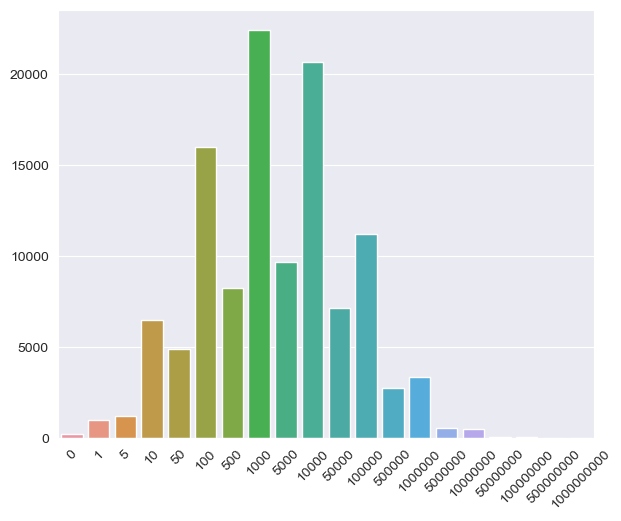

In [ ]:
value_counts_num_downloads = google_first['num_downloads'].value_counts()
print(value_counts_num_downloads)
# sort series based on the length the index

def extract_number(string):
    # Remove non-digit characters and convert to integer
    return int(''.join([c for c in string if c.isdigit()]))

# remapping the current values from string bins to integer bins
mapper = {}
for index in value_counts_num_downloads.index:
  mapper[index] = extract_number(index)
value_counts_num_downloads.rename(mapper, inplace=True, axis='index')
value_counts_num_downloads.sort_index(inplace=True)


print(value_counts_num_downloads)
x = value_counts_num_downloads.index
y = value_counts_num_downloads.values

sns.barplot(x=x, y=y)
plt.tight_layout()
plt.xticks(rotation=45)

plt.show()

### content_rating_app
* Possibly switching to just the 'PEGI' rating
* Possibly working with dummy variables for the categories

*"PEGI (/ˈpɛɡi/ PEG-ee), short for Pan-European Game Information, is a European video game content rating system established to help European consumers make informed decisions when buying video games or apps through the use of age recommendations and content descriptors."*

In [ ]:
# many different content ratings
google_first['content_rating_app'].value_counts().where(lambda x : x > 3).dropna()

# numer of unqiue content ratings:
# google first
print(len(google_first['content_rating_app'].unique()))

# google last
print(len(google_last['content_rating_app'].unique()))

100
117


<Axes: >

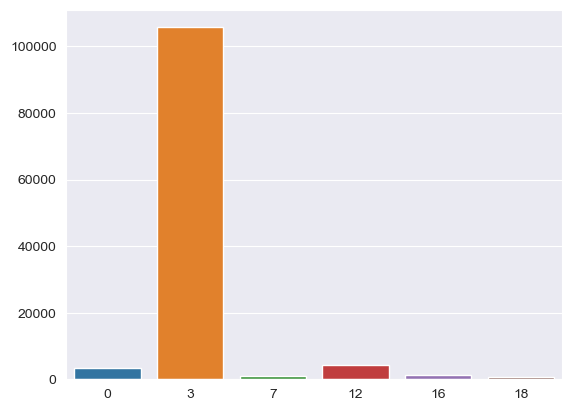

In [ ]:
# extract all PEGI ratings from the content_rating_app column
google_first['PEGI_rating'] = google_first['content_rating_app'].str.extract('PEGI\s(\d+)')
# fill NaN with '0'
google_first['PEGI_rating'].fillna('0', inplace=True)
# Convert to int
google_first['PEGI_rating'] = google_first['PEGI_rating'].astype(int)

# plot the PEGI rating as a barplot using the counts of every rating
sns.barplot(x=google_first['PEGI_rating'].value_counts().index, y=google_first['PEGI_rating'].value_counts().values)

Some other stuff also included in this column:

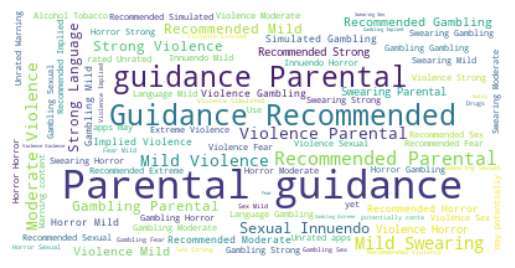

In [ ]:
# make a new column with string that does not contain the PEGI rating
google_first['content_rating_app_string'] = google_first['content_rating_app'].str.replace('PEGI\s\d+', '', regex=True)

# remove all the 'Learn More' strings
google_first['content_rating_app_string'] = google_first['content_rating_app_string'].str.replace('Learn More', '')

# make a wordcloud of the content_rating_app_string column
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(' '.join(google_first['content_rating_app_string']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### categ_app
* Most apps are in the 'game' category
* 'game' category is by far the biggest
* 'game' category is also the category with the highest average rating
* 'game' category is also the category with the highest number of ratings
* 'game' category is also the category with the highest number of downloads
* 'game' category is also the category with the highest price
* 'game' category is also the category with the highest number of reviews
* 'game' category is also the category with the highest number of installs
* 'game' category is also the category with the highest number of reviews per rating
* 'game' category is

In [ ]:
categ_app = google_first['categ_app'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
categ_app

categ_app
Education                  9.3%
Entertainment              7.4%
Personalization            6.5%
Tools                      6.4%
Lifestyle                  6.1%
Books & Reference          5.6%
Music & Audio              5.0%
Business                   4.3%
Photography                3.4%
Travel & Local             3.1%
News & Magazines           2.9%
Productivity               2.8%
Health & Fitness           2.7%
Puzzle                     2.2%
Sports                     2.2%
Finance                    2.2%
Casual                     2.1%
Communication              1.9%
Social                     1.9%
Arcade                     1.8%
Shopping                   1.7%
Maps & Navigation          1.5%
Simulation                 1.5%
Medical                    1.5%
Food & Drink               1.4%
Action                     1.2%
Video Players & Editors    1.0%
Adventure                  0.8%
Art & Design               0.7%
Auto & Vehicles            0.6%
Educational                0.6

### developer & developer_name
the code belows shows counts for the number of apps per developer appeared
* Noticed some strange developer names
* 2 variables representing the developer

In [ ]:
developer_first = google_first['developer']
developer_last = google_last['developer']
print(f'number of developers google first: {len(developer_first.unique())}' )
print(f'number of developers google second: {len(developer_last.unique())}' )

# top 10 developers
google_first['developer'].value_counts()[:10]

number of developers google first: 59596
number of developers google second: 72337


ZT.art                           124
Subsplash+Inc                    111
Amino+Apps                        88
%2BHOME+by+Ateam                  76
Magzter+Inc.                      72
iniCall.com                       70
Weather+Widget+Theme+Dev+Team     65
Kirill+Sidorov                    52
OrderYOYO                         49
5602679406184809201               44
Name: developer, dtype: int64

In [ ]:
# different variable and not fully the same?
google_first['developer_name'].value_counts()[:10]

developer_name
ZT.art                           124
Subsplash Inc                    111
Amino Apps                        88
+HOME by Ateam                    76
Magzter Inc.                      72
iniCall.com                       70
Weather Widget Theme Dev Team     65
Kirill Sidorov                    52
OrderYOYO                         49
LoyaltyPlant                      44
Name: count, dtype: int64

### in_app
Boolean var if there are in app purchases!

In [ ]:
google = [google_first, google_last]
for i in range(2):
  print(f'set: {i+1}')
  print(google[i].value_counts('in_app')/ sum(google[i].value_counts('in_app')))
  print('\n')

set: 1
in_app
False    0.894248
True     0.105752
dtype: float64


set: 2
in_app
False    0.889309
True     0.110691
dtype: float64




### has_ads
* Less apps have adds in the second dataset
* What is the cause? Does this have something to do with strategy of the sellers?

In [ ]:
google = [google_first, google_last]
for i in range(2):
  print(f'set: {i+1}')
  print(google[i].value_counts('has_ads') / sum(google[i].value_counts('has_ads')))
  print('\n')

set: 1
has_ads
True     0.600782
False    0.399218
dtype: float64


set: 2
has_ads
True     0.502291
False    0.497709
dtype: float64




### price_gplay
* Pain in my ass to clean this

##### Remarks
* Could be interesting variable to to descriptive statistics (for ex. price & downloads, avg. price within cat)

In [ ]:
def clean_with_regex(string):
  return re.sub(r'\x80', '', string)

google_first['price_gplay'] = google_first['price_gplay'].astype(str)

google_first['price_gplay'] = google_first['price_gplay'].apply(clean_with_regex)

google_first['price_gplay'] = (google_first['price_gplay']
                               .str.replace(',','.')
                               .str.replace('£', '')
                               .astype(float))

# print ratio of price_gplay == 0 to total number of apps
print('percentage of free apps: ', sum(google_first['price_gplay'] == 0) / len(google_first['price_gplay']))

percentage of free apps:  0.8947458864974008


The following is excluding free apps:

<Axes: xlabel='price_gplay', ylabel='Count'>

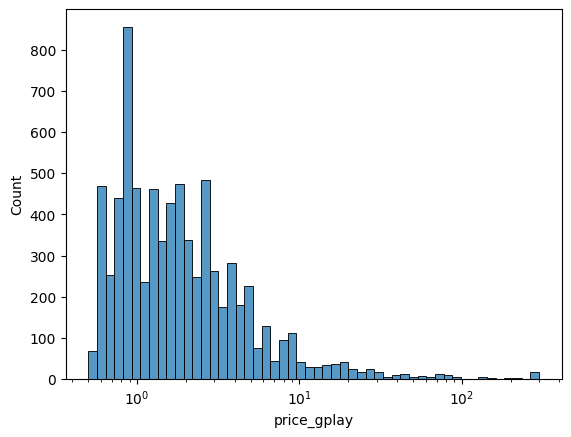

In [ ]:
# make hist plot of price_gplay excluding 0 values on log scale
sns.histplot(x=google_first['price_gplay'][google_first['price_gplay'] != 0], log_scale=True)

### interactive_element
What is the interactive element in the app?

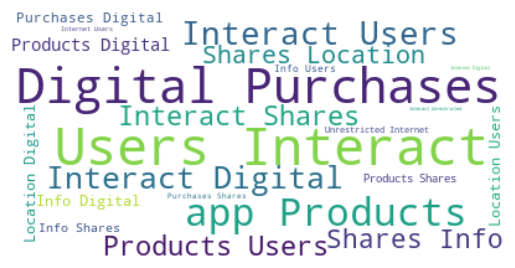

In [ ]:
# make wordcloud of interactive_element column do not include nan values
google_first['interactive_element'].fillna('', inplace=True)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(' '.join(google_first['interactive_element']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()



### in_app_product
says something about the amount you can spend for in_app_products, not all apps have this variable

e.g.: Â£0.89 - Â£4.49 per item

Could also check the ratio of free aps vs paid apps against in_app_product

In [ ]:
print('percentage of apps with in app products: ', sum(google_first['in_app_product'].notna()) / len(google_first['in_app_product']))

percentage of apps with in app products:  0.10575245950938694


### nb_screen
number of screenshots off the app founded in the app store (purpose is description)

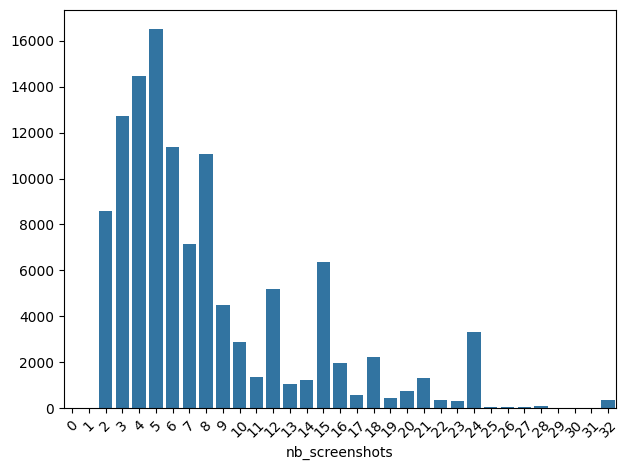

In [ ]:
# barplot of nb_screenshots column with the counts of every value
google_first['nb_screenshots'].fillna(0, inplace=True)
google_first['nb_screenshots'] = google_first['nb_screenshots'].astype(int)

sns.barplot(x=google_first['nb_screenshots'].value_counts().index, y=google_first['nb_screenshots'].value_counts().values)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### description
some descriptive statistics of of the length of description

also ran a language detect, do not run again took 10 mins on my beefy machine ~ R

In [ ]:
# really interesting
google_first['description'].str.len().describe()

count    116385.000000
mean       1218.431258
std        1088.925634
min           9.000000
25%         433.000000
50%         879.000000
75%        1675.000000
max        8118.000000
Name: description, dtype: float64

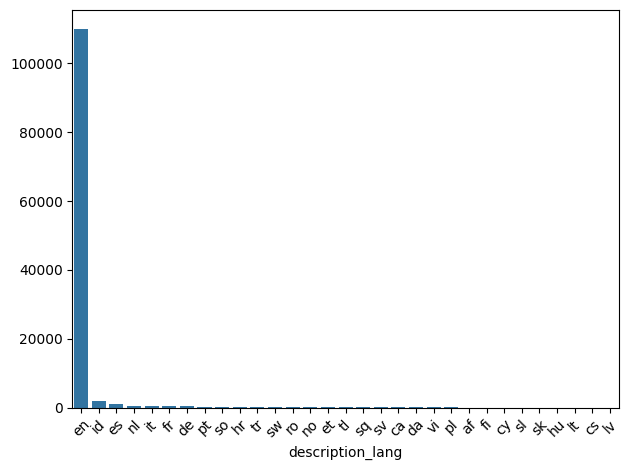

In [ ]:
# make a new column with description language
google_first['description_lang'] = google_first['description'].apply(detect)

# make a barplot of the description_lang column
sns.barplot(x=google_first['description_lang'].value_counts().index, y=google_first['description_lang'].value_counts().values)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### email_to and developer_info

contains info such as:
- surveillance171@gmail.com
- Visit website    video.surveillance171@gmail.com

### similar_apps_top15
Example:
- com.mcu.reolink, com.tvt.superliveplus, com.mining.app.mipca, com.mcu.guardingvision, com.hichip

We could do some clustering with this

### visit_website
contains only website links

### more_from_developer
contains list of other app from developer, seems safer to extract this info ourselves
- example: com.altimimi.karar.HussainFaisal, com.altimimi.karar.Basem, com.altimimi.shortstory, com.altimimi.karar.wamadat

### family_library
Boolean indicator for whether or not the app can be shared in the family library (a google function)

Whatever that means

### permissions
What permissions do they ask???

Can do numerous interesting researches with this
- could possible cluster the type of permission on how invasive it is or if it is justified for the workings of the app
- compare it against price

*If you are not paying for the product you are the product*


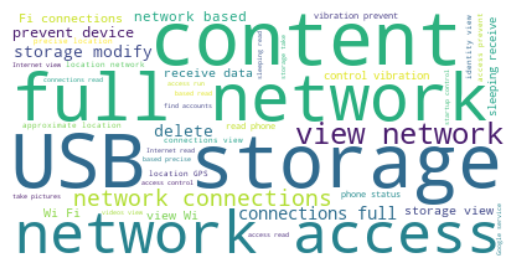

In [ ]:
# extract all the permissions and put in a list
all_permissions = []
for permission in google_first['permissions']:
  if type(permission) == str:
    all_permissions.extend(permission.split(','))

# make a wordcloud of the permissions
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(' '.join(all_permissions))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


## Multivariate Analysis Basic!

- Ideas Huub:

- Ideas Roman: Lil' matrix that tells absolutely nothing! Should do better multivariate analysis when theoretical lenses are picked.

In [ ]:
google_first.drop(['Unnamed: 0'], axis=1, inplace=True)

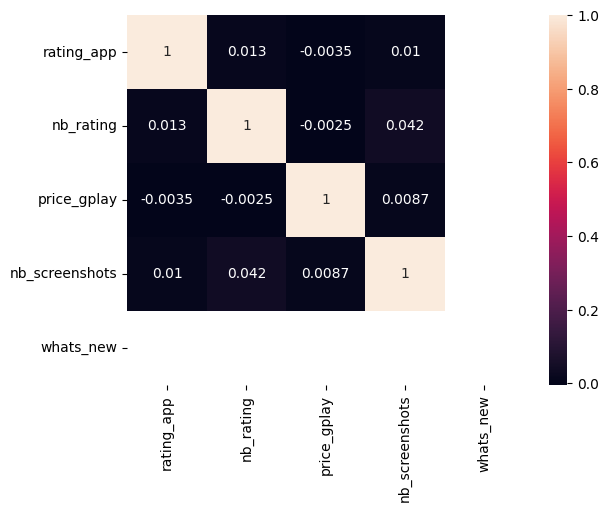

In [ ]:
numeric_vars = google_first.select_dtypes(include=np.number).columns
corr_matrix = google_first[numeric_vars].corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()


## Interesting RQ's